## Introduction

- Simulation by Monte Carlo experimentation is a useful and powerful methodology for investigating the properties of econometric estimators and tests.
- This lecture deals with the basic elements common to Monte Carlo experiments.

## Pseudorandom-number generators: Introduction

- The literature on (pseudo) random-number generation contains many methods of generating such sequences of numbers.
- When we use packaged functions, we usually do not need to know the details of the method.
- We use the functions in package `scipy.stats` to do all jobs.

- The term random-number generation is an oxymoron. It is more accurate to use the term pseudorandom numbers. 
- Pseudorandom-number generators use deterministic devices to produce long chains of numbers that mimic the realizations from some target distribution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from scipy import stats

- To obtain and display one draw from the uniform

In [2]:
u=stats.uniform()
u.rvs(10)

array([0.07737352, 0.31020277, 0.15300268, 0.37525547, 0.08224191,
       0.48134482, 0.80304746, 0.35047335, 0.220087  , 0.39337112])

- The following code obtains 1,000 draws from the uniform distribution and then provides some details on these draws

In [3]:
np.random.seed(10101)
x=u.rvs(1000)
stats.describe(x)

DescribeResult(nobs=1000, minmax=(0.00032206291001801723, 0.995175745239081), mean=0.5017741304923393, variance=0.08210324558389188, skewness=-0.018567783824904593, kurtosis=-1.2014644551761526)

- The draws should be serially uncorrelated, despite a deterministic rule being used to generate the draws. 

In [4]:
t=pd.DataFrame({'x':x,'L.x':np.append(np.roll(x,-1)[:-1],[np.nan]),'L2.x':np.append(np.roll(x,-2)[:-2],[np.nan]*2),'L3.x':np.append(np.roll(x,-3)[:-3],[np.nan]*3)})
t.corr()

,x,L.x,L2.x,L3.x
x,1.000000,0.017759,0.014773,0.075085
L.x,0.017759,1.000000,0.019471,0.015882
L2.x,0.014773,0.019471,1.000000,0.018320
L3.x,0.075085,0.015882,0.018320,1.000000


- The command for making draws from the standard normal has the following simple syntax

In [5]:
np.random.seed(10101)
y=stats.norm().rvs(1000)
z=stats.norm(5,2).rvs(1000)
pd.DataFrame({'uni':x,'norm':y,'norm52':z}).describe([])

,uni,norm,norm52
count,1000.000000,1000.000000,1000.000000
mean,0.501774,0.010446,5.008237
std,0.286537,1.010045,1.990206
min,0.000322,-3.222765,-1.393451
50%,0.503928,0.001511,4.977991
max,0.995176,3.568002,11.612393


- The following example generates draws from $t(10), \chi^2(10)$, and $F(10, 5)$.

In [6]:
np.random.seed(10101)
xt=stats.t(10).rvs(2000)
xc=stats.chi2(10).rvs(2000)
xf=stats.f(10,5).rvs(2000)
pd.DataFrame({'t':xt,'chi2':xc,'f':xf}).describe([])

,t,chi2,f
count,2000.000000,2000.000000,2000.000000
mean,-0.043613,9.837877,1.660624
std,1.115371,4.474405,2.131365
min,-4.831688,0.698100,0.054189
50%,-0.027626,9.111350,1.071047
max,3.981017,32.352325,42.602865


- We consider draws from the binomial distribution, when both the probability p and the number of trials n may vary over i.

In [7]:
np.random.seed(10101)
p=stats.uniform().rvs(2000)
n=np.random.randint(1,11,size=2000)
xb=stats.binom(n,p).rvs(2000)
pd.DataFrame({'p':p,'n':n,'binom':xb}).describe([])

,p,n,binom
count,2000.000000,2000.000000,2000.000000
mean,0.499713,5.487500,2.782000
std,0.287319,2.831581,2.456113
min,0.000127,1.000000,0.000000
50%,0.501923,5.000000,2.000000
max,0.999122,10.000000,10.000000


- For simulating a Poisson regression DGP, denoted $y \sim Poisson(\mu)$, we need to make draws that are independent but not identically distributed, with the mean $\mu$ varying across draws because of regressors.

- We do so in two ways. 
    + First, let $\mu_i$ equal xb=4+2*x with x=uniform(). Then $4 < \mu_i < 6$. 
    + Second, let $\mu_i$ equal xb times xg where xg=gamma(1,1), which yields a draw from the gamma distribution with a mean of 1 and a variance of 1 . Then $\mu_i > 0$. 

- In both cases, the setup can be shown to be such that the ultimate draw has a mean of 5, but the variance differs from 5 for the independent and identically distlibuted(i.i.d.)

In [8]:
np.random.seed(10101)
xg=stats.gamma(1).rvs(2000)
xb=stats.uniform(loc=4,scale=2).rvs(2000)
xp=stats.poisson(5).rvs(2000)
xp1=stats.poisson(xb).rvs(2000)
xnb=stats.poisson(xb*xg).rvs(2000)
pd.DataFrame({'gamma':xg,'binom':xb,'possion1':xp,'possion2':xp1,'negbio':xnb}).describe([])

,gamma,binom,possion1,possion2,negbio
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.984727,4.997481,5.032000,5.042000,4.921000
std,0.951064,0.570226,2.256883,2.392718,5.207333
min,0.000127,4.001488,0.000000,0.000000,0.000000
50%,0.697000,4.988912,5.000000,5.000000,3.000000
max,7.037526,5.999913,15.000000,15.000000,32.000000


- For a visual depiction, it is often useful to plot a histogTam or kernel density estimate of the generated random numbers. 
- Here we do this for the draws xc from $\chi^2(10)$ and xp from Poisson(5)

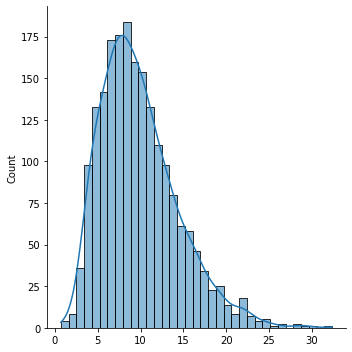

In [9]:
%matplotlib inline
sns.displot(xc, kde=True);

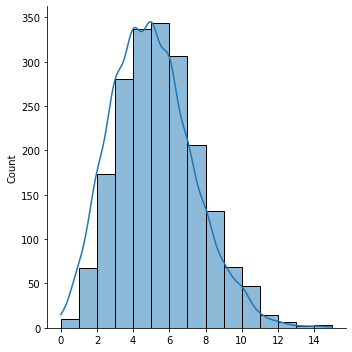

In [10]:
sns.displot(xp,bins=15, kde=True);

## Distribution of the sample mean

- As an introductory example of simulation, we demonstrate the central limit theorem result.
- The sample mean is approximately normally distributed as $N\rightarrow \infty$
- We consider a random variable that has the uniform distribution, and a sample size of 30.

In [11]:
np.random.seed(10101)
u=stats.uniform()
x=u.rvs(30)
stats.describe(x)

DescribeResult(nobs=30, minmax=(0.002594691771542257, 0.9945576355775707), mean=0.4530167496871454, variance=0.10016992985067126, skewness=0.25040052588043527, kurtosis=-1.310384263114149)

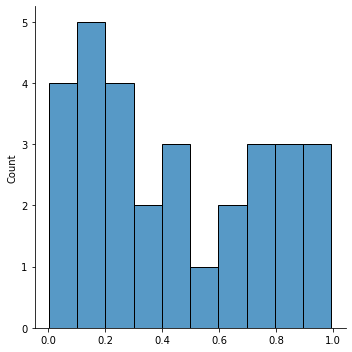

In [12]:
sns.displot(x,bins=10);

- To obtain the distribution of the sample mean by simulation, we redo the preceding 10,000 times, obtaining 10,000 samples of size 30 and 10,000 sample means x. 
- By the central limit theorem, the distribution of the sample-mean estimator has approximately a normal distribution. 

- Because the mean of a uniform(0, 1) distribution is 0.5, the mean of the distribution of the sample-mean estimator is 0.5. 
- Because the standard deviation of a uniform(0, 1) distribution is $\sqrt{1/12}$ and each of the 10,000 samples is of size 30, the variance of the distribution of the sample-mean estimator is ${(1/12)\over 30} = 0.0027$.

In [13]:
x=u.rvs((10000,30))
y=x.mean(axis=1)
stats.describe(y)

DescribeResult(nobs=10000, minmax=(0.2937750617417994, 0.6967215777658147), mean=0.5010200602910416, variance=0.0028327595380232716, skewness=-0.024671097426171917, kurtosis=-0.0824326978344958)

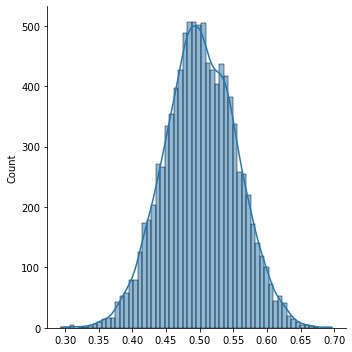

In [14]:
sns.displot(y, kde=True);

## Computing integrals

- Some estimation problems may involve definite or indefinite integrals. 
- In such cases, the integral may be numerically calculated.
- As an example, we consider the computation of $E[\exp\{-\exp(Y)\}]$ when $y \sim N(0,1)$.

- This is the integral: $$ E[\exp\{-\exp(Y)\}] = \int^\infty_{-\infty}{1\over\sqrt{2\pi}}\exp\{-\exp(y)\}\exp(-y^2/2)dy $$
- It has no closed-form solution but can be proved to exist.
- We use the estimate $$ \hat{E}[\exp\{-\exp(Y)\}] = \frac{1}{S}\sum_{s=1}^S\exp\{-\exp(y^s)\} $$ where $y^s$ is the sth draw of S draws from the N(0, 1) distribution.

In [15]:
S=100
np.random.seed(10101)
y=stats.norm(0,1).rvs(S)
np.mean(np.exp(-np.exp(y)))

0.38504357279752954

In [16]:
from scipy.integrate import quad
quad(lambda y: np.exp(-np.exp(y))*np.exp(-y**2/2)/np.sqrt(2*np.pi),-np.inf,np.inf)

<ipython-input-16-78830ca2d840>:2: RuntimeWarning: overflow encountered in exp
  quad(lambda y: np.exp(-np.exp(y))*np.exp(-y**2/2)/np.sqrt(2*np.pi),-np.inf,np.inf)


(0.3817564647554693, 2.3231972616621212e-09)

## Simulation for regression: Introduction

- The simplest use of simulation methods is to generate a single dataset and estimate the DGP prarmeter $\theta$
- More often, $\theta$ is estimated from each of $S$ generated datasets, and the estimates are stored and summarized to learn about the distribution of $\hat{\theta}$ for a given DGP.

- We consider the following DGP, $$ y=\beta_1+\beta_2 x+u; \; u\sim\chi^2(1)-1; \; x\sim\chi^2(1) $$ where $\beta_1=1,\beta_2=2$, and the sample size $N=150$.
- We wish to perform 1000 simulations, where in each simulation we obtain parameter estimates, standard errors, t-values for the t test of $H_0:\beta_2=2$, and the outcome of a two-sided test of $H_0$ at level 0.05.

- We first write a program, which generates data on y, performs OLS, and returns $\hat{\beta}_2, S_{\hat{\beta}_2}, t_2 = (\hat{\beta}_2 - 2)/S_{\hat{\beta}_2}$, and the p-value for the two-sided t test.

In [17]:
np.random.seed(10101)
n=150
N=1000
u=stats.chi2(1).rvs(n)-1
x=stats.chi2(1).rvs(n)
y=1+2*x+u
ds=pd.DataFrame({'y':y,'x':x})
res=smf.ols(formula='y~x',data=ds).fit()
print(res.t_test('x=2'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.9671      0.088     -0.374      0.709       1.793       2.141


- Below we simulate the program N times to store the results; here N = 1000.

In [18]:
np.random.seed(10101)
result=pd.DataFrame(columns=('beta','std','t','p'))
u=stats.chi2(1).rvs((N,n))-1
x=stats.chi2(1).rvs((N,n))
y=1+2*x+u
for i,j in zip(x,y):
    ds=pd.DataFrame({'y':j,'x':i})
    res=smf.ols(formula='y~x',data=ds).fit()
    r=res.t_test('x=2')
    t={'beta':res.params['x'],'std':r.sd[0][0],'t':r.tvalue[0][0],'p':r.pvalue}
    result=result.append(t,ignore_index=True)
result['reject']=(result.p<0.05).astype(int)
result[['beta','std','reject']].describe(percentiles=[])

,beta,std,reject
count,1000.000000,1000.000000,1000.000000
mean,2.001814,0.082426,0.044000
std,0.083965,0.017360,0.205198
min,1.778631,0.040130,0.000000
50%,1.998077,0.080322,0.000000
max,2.416673,0.156322,1.000000


- Because we impose looser restrictions on the DGP, t statistics are not exactly t distributed. 
- However, the extent to which they diverge from the reference distribution disappears as the sample size increases.
- The output below generates the graph, which compares the density of the t statistics with the t(148) distribution.

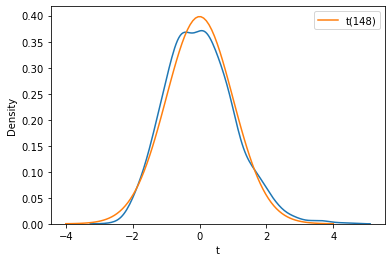

In [19]:
sns.kdeplot(result.t)
x=np.linspace(-4,4,100)
plt.plot(x,stats.t(148).pdf(x),label='t(148)')
plt.legend()
plt.show()

- The power of a test is the probability that it rejects a false null hypothesis. 
- To simulate the power of a test, we estimate the rejection rate for a test against a false null hypothesis.
- The larger the difference between the tested value and the true value, the greater the power and the rejection rate. 
- The example below modifies the program to estimate the power of a test against the false null hypothesis that $\beta_2 = 2.1$.

In [20]:
np.random.seed(10101)
result=pd.DataFrame(columns=('beta','std','t','p'))
u=stats.chi2(1).rvs((N,n))-1
x=stats.chi2(1).rvs((N,n))
y=1+2*x+u
for i,j in zip(x,y):
    ds=pd.DataFrame({'y':j,'x':i})
    res=smf.ols(formula='y~x',data=ds).fit()
    r=res.t_test('x=2.1')
    t={'beta':res.params['x'],'std':r.sd[0][0],'t':r.tvalue[0][0],'p':r.pvalue}
    result=result.append(t,ignore_index=True)
result['reject']=(result.p<0.05).astype(int)
result[['beta','std','reject']].describe(percentiles=[])

,beta,std,reject
count,1000.000000,1000.000000,1000.000000
mean,2.001814,0.082426,0.260000
std,0.083965,0.017360,0.438854
min,1.778631,0.040130,0.000000
50%,1.998077,0.080322,0.000000
max,2.416673,0.156322,1.000000


- Establishing estimator inconsistency requires less coding because we need to generate data and obtain estimates only once, with a large N, and then compare the estimates with the DGP values

- The DGP considered is $$ \begin{matrix}
y & = & \beta x^*+u; & x^*\sim N(0,9); \; u\sim N(0,1) \\
x & = & x^*+v; & v\sim N(0,1)
\end{matrix} $$ OLS regression of y on $x^*$ consistently estimates $\beta$.
- However, only data on x rather than $x^*$ are abailable, so we instead obtain $\hat{\beta}$ from an OLS regression of y on x.
- It is a well-known result that then $\hat{\beta}$ is in consistent, with a downward bias, $s\beta$, where $s=\sigma_v^2/(\sigma_v^2+\sigma_{x^*}^2)$ is the noise-signal ratio.

In [21]:
np.random.seed(10101)
mu=[0,0,0]
var=[[9,0,0],
     [0,1,0],
     [0,0,1]] 
ds=stats.multivariate_normal(mu,var).rvs(10000)
ds=pd.DataFrame(ds,columns=['xsar','u','v'])
ds['y']=ds.xsar+ds.u
ds['x']=ds.xsar+ds.v
res=smf.ols(formula='y~x-1',data=ds).fit()
res.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
x,0.9078,0.004,207.607,0.000,0.899,0.916


- Endogeneity is one of the most frequent causes of estimator inconsistency.
- We adapt the previous DGP as follows: $$ \begin{matrix}
y & = & \beta_1+\beta_2 x+u; & u\sim N(0.1); \\
x & = & z+0.5u; & z\sim N(0,1)
\end{matrix} $$ We set $\beta_1=10$ and $\beta_2=2$. We let N=150.

In [22]:
np.random.seed(10101)
u=stats.norm().rvs(150)
x=stats.norm().rvs(150)+0.5*u
y=10+2*x+u 
ds=pd.DataFrame({'y':y,'x':x})
res=smf.ols(formula='y~x',data=ds).fit()
res.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.9327,0.077,129.003,0.000,9.780,10.085
x,2.3632,0.070,33.722,0.000,2.225,2.502


In [23]:
np.random.seed(10101)
result=pd.DataFrame(columns=('beta','std','t','p'))
u=stats.norm().rvs((N,n))
x=stats.norm().rvs((N,n))+0.5*u
y=10+2*x+u
for i,j in zip(x,y):
    ds=pd.DataFrame({'y':j,'x':i})
    res=smf.ols(formula='y~x',data=ds).fit()
    r=res.t_test('x=2')
    t={'beta':res.params['x'],'std':r.sd[0][0],'t':r.tvalue[0][0],'p':r.pvalue}
    result=result.append(t,ignore_index=True)
result['reject']=(result.p<0.05).astype(int)
result[['beta','std','reject']].describe(percentiles=[])

,beta,std,reject
count,1000.000000,1000.000000,1000.0
mean,2.399375,0.065759,1.0
std,0.065389,0.005500,0.0
min,2.187916,0.050765,1.0
50%,2.397897,0.065683,1.0
max,2.611468,0.085257,1.0
